# Protocols with steps and sine waves

Just as in the [steps and ramps example](steps-and-ramps.ipynb), we can combine step protocols with dynamically inserted equations to implement sine wave protocols

First, we load a model and protocol, and show the result without sine waves

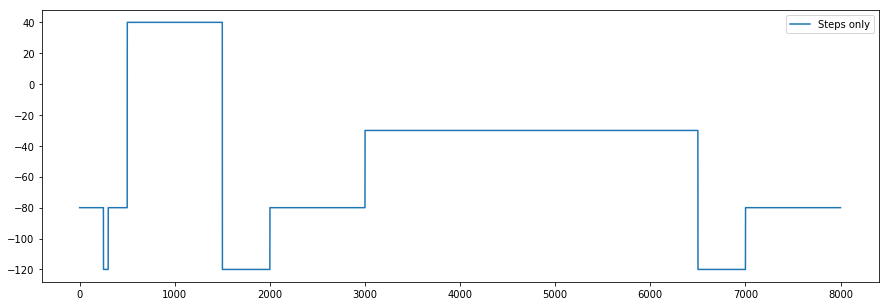

In [2]:
import matplotlib.pyplot as plt
import myokit
import numpy as np

m = myokit.load_model('beattie-2017-ikr-hh.mmt')
p = myokit.load_protocol('sine-wave-steps.mmt')
s = myokit.Simulation(m, p)

tmax = 8000
times = np.linspace(0, tmax, tmax*10)
d1 = s.run(tmax, log_times=times)

plt.figure(figsize=(15, 5))
plt.plot(d1.time(), d1['membrane.V'], label='Steps only')
plt.legend()
plt.show()

Next, we dynamically add in the sines:

In [3]:
# Load the model
m = myokit.load_model('beattie-2017-ikr-hh.mmt')

# Get the membrane component
c = m.get('membrane')

# Get the voltage variable, and remove its binding to `pace`
v = c.get('V')
v.set_binding(None)

# Add a p variable
vp = c.add_variable('vp')
vp.set_rhs(0)
vp.set_binding('pace')

# Update V's RHS
m.get('membrane.V').set_rhs(
    'if(engine.time >= 3000.1 and engine.time < 6500.1,'
    + ' - 30'
    + ' + 54 * sin(0.007 * (engine.time - 2500.1))'
    + ' + 26 * sin(0.037 * (engine.time - 2500.1))'
    + ' + 10 * sin(0.190 * (engine.time - 2500.1))'
    + ', vp)')


We can now run simulations with the updated model:

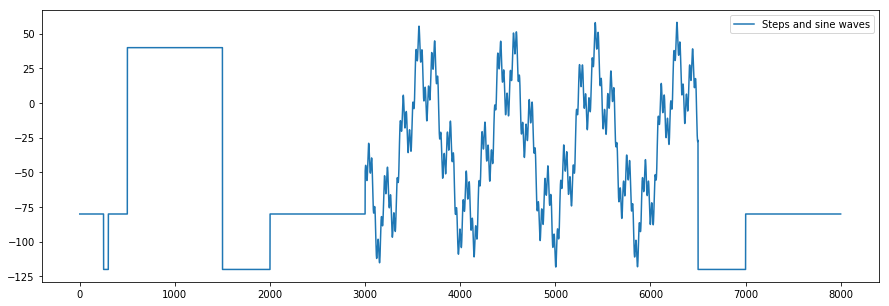

In [4]:
s = myokit.Simulation(m, p)

d2 = s.run(tmax, log_times=times)

plt.figure(figsize=(15, 5))
plt.plot(d2.time(), d2['membrane.V'], label='Steps and sine waves')
plt.legend()
plt.show()